In [2]:
import re
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,make_scorer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [3]:
bug2 = pd.read_csv("/content/drive/MyDrive/data_bug2.txt", sep=' ')
bug2.info()
print(bug2.shape)
bug2.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   sx      100000 non-null  float64
 1   sy      100000 non-null  float64
 2   gx      100000 non-null  float64
 3   gy      100000 non-null  float64
 4   d       100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB
(100000, 5)


,sx,sy,gx,gy,d
0,-20.35270,-13.16810,-16.861800,13.85940,31.08
1,14.82350,-13.84960,-20.188700,-3.87179,58.32
2,4.74891,11.81420,2.400610,-13.78990,56.64
3,18.46640,9.81196,18.237600,11.75590,1.56
4,-20.50850,-6.13263,3.950740,-11.31420,102.18
5,-18.31010,1.08730,12.167900,11.06870,45.06
6,11.88640,-12.40120,-0.339672,-6.48306,59.28


In [4]:
bug2.describe()

,sx,sy,gx,gy,d
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.558475,-1.111631,2.461731,-1.162655,62.395794
std,13.772926,9.125932,13.824945,9.114331,47.137511
min,-21.999600,-13.999900,-21.999800,-13.999900,0.000000
25%,-8.671688,-9.578298,-8.958005,-9.627072,22.725000
50%,4.375180,-2.599365,4.251060,-2.675130,55.020000
75%,14.506300,7.541390,14.487900,7.334085,90.480000
max,21.999300,13.999900,21.999900,14.000000,258.660000


In [5]:
d_label = bug2['d']

In [6]:
bug2.drop(['d'],axis=1,inplace = True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(bug2, d_label, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
print(scaler.mean_)
X_test1 = scaler.transform(X_test)

print(type(X_train1))
print(type(X_test1))

[ 2.5758674  -1.12390206  2.46324972 -1.16738687]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR


classifiers_list = {
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Naive Bayes Regressor" : GaussianProcessRegressor(),
    "Neural Network Regressor" : MLPRegressor(),
    "Adaboost" : AdaBoostRegressor(base_estimator=RandomForestRegressor()),
    "SVR": SVR()                           
}

classifiers_count = len(classifiers_list.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(classifiers_count,5)), columns = ['classifier', 'Recall', 'F1', 'Precision', 'Accuracy'])

for c_name, classifier in classifiers_list.items():
  classifier.fit(X_train,y_train)
  prediction = []
  prediction = classifier.predict(X_test)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, X_train, y_train, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print(prediction)
  #print(classification_report(y_test,prediction))
  print(mean_squared_error(y_test,prediction, squared=False))

In [10]:
classifiers_list = {
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"Naive Bayes Regressor" : GaussianProcessRegressor(),
    "Neural Network Regressor" : MLPRegressor()
}

classifiers_count = len(classifiers_list.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(classifiers_count,5)), columns = ['classifier', 'Recall', 'F1', 'Precision', 'Accuracy'])

for c_name, classifier in classifiers_list.items():
  classifier.fit(X_train1,y_train)
  prediction = []
  prediction = classifier.predict(X_test1)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, X_train1, y_train, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print(prediction)
  #print(classification_report(y_test,prediction))
  print(mean_squared_error(y_test,prediction, squared=False))

Classifier+OneHotEncoder K-Neighbors Regressor
Cross validation [0.95790924 0.95540089 0.95564788 0.9566909  0.95506911]
[ 53.748  34.08  124.788 ...  45.108  25.392  54.24 ]
9.509439531623302
Classifier+OneHotEncoder Decision Tree Regressor
Cross validation [0.90688291 0.90322222 0.90317568 0.91455561 0.90675217]
[ 52.92  34.44 107.46 ...  45.36  26.46  52.86]
14.016947170479026
Classifier+OneHotEncoder Random Forest Regressor
Cross validation [0.95614924 0.95556907 0.95358417 0.95704907 0.95472031]
[ 51.354   34.7754 146.0046 ...  45.9414  25.239   52.6866]
9.693991643201576


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Classifier+OneHotEncoder Neural Network Regressor
Cross validation [0.81837745 0.79905087 0.82397237 0.82021138 0.8302946 ]
[ 44.12417048  27.9305746  115.26066418 ...  24.98848521  18.61378319
  55.85931567]
19.53060301989341


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [11]:
print(y_test)

3582      53.04
60498     34.68
53227    129.12
21333     62.64
3885      59.16
          ...  
60116     61.98
2415      20.94
43763     45.84
71345     24.90
77687     53.16
Name: d, Length: 20000, dtype: float64


In [12]:
import sklearn.metrics
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=hp_candidates, cv=5,scoring='r2')

grid.fit(X_train1,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             scoring='r2')

In [14]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Accuracy : 0.9582734325923965


In [22]:
hp_candidates = [{"max_depth" : [None,2,4,6,8,10,12], }]
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=hp_candidates, cv=5)
grid.fit(X_train1,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                        12]}])

In [23]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'max_depth': None}
Accuracy : 0.9057270160611951


In [17]:
hp_candidates = [{'n_estimators': [10,20,30,40],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [None,2,3,4,5]}]
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=hp_candidates, cv=5,scoring='neg_mean_absolute_error')
grid.fit(X_train1,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [None, 2, 3, 4, 5],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 40]}],
             scoring='neg_mean_absolute_error')

In [18]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'max_depth': None, 'max_features': 'auto', 'n_estimators': 40}
Accuracy : -4.5210631125


In [19]:
classifiers_list = {
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors = 2, p = 2, weights = 'distance'),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth= None),
    "Random Forest Regressor": RandomForestRegressor(max_depth= None, max_features = 'auto', n_estimators = 40),
    #"Naive Bayes Regressor" : GaussianProcessRegressor(),
    "Neural Network Regressor" : MLPRegressor()
}

classifiers_count = len(classifiers_list.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(classifiers_count,5)), columns = ['classifier', 'Recall', 'F1', 'Precision', 'Accuracy'])

for c_name, classifier in classifiers_list.items():
  classifier.fit(X_train1,y_train)
  prediction = []
  prediction = classifier.predict(X_test1)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, X_train1, y_train, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print(prediction)
  #print(classification_report(y_test,prediction))
  print(mean_squared_error(y_test,prediction, squared=False))

Classifier+OneHotEncoder K-Neighbors Regressor
Cross validation [0.95171266 0.9502014  0.95259018 0.95294602 0.94923148]
[ 52.30169881  32.99351873 145.48004059 ...  45.60925937  25.55738142
  52.83870022]
10.163535779197355
Classifier+OneHotEncoder Decision Tree Regressor
Cross validation [0.90723194 0.90185824 0.90154257 0.91268159 0.90455931]
[ 52.92  34.32 107.46 ...  45.36  26.46  52.74]
14.087015076303425
Classifier+OneHotEncoder Random Forest Regressor
Cross validation [0.9560381  0.95460111 0.95257575 0.95547944 0.95304388]
[ 51.828   34.5825 148.911  ...  45.585   25.4745  52.8315]
9.849071699470588


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Classifier+OneHotEncoder Neural Network Regressor
Cross validation [0.81797425 0.82557981 0.81994791 0.82640348 0.83188815]
[ 43.71138528  32.30164145 109.68240518 ...  33.30781509  27.30334201
  64.86746883]
20.253207010597386


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [20]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 11.888223827805398
RMSE value for k=  2 is: 10.265583827040722
RMSE value for k=  3 is: 9.842908972453214
RMSE value for k=  4 is: 9.722429523915306
RMSE value for k=  5 is: 9.655117643944067
RMSE value for k=  6 is: 9.639658604432006
RMSE value for k=  7 is: 9.677903698674436
RMSE value for k=  8 is: 9.722679412814916
RMSE value for k=  9 is: 9.768395860347
RMSE value for k=  10 is: 9.822937574096661
RMSE value for k=  11 is: 9.906196556234073
RMSE value for k=  12 is: 9.975580568380469
RMSE value for k=  13 is: 10.041009049219548
RMSE value for k=  14 is: 10.106092232527217
RMSE value for k=  15 is: 10.16928041611598
RMSE value for k=  16 is: 10.233886727844869
RMSE value for k=  17 is: 10.30946144081513
RMSE value for k=  18 is: 10.354768957103776
RMSE value for k=  19 is: 10.432988483980504
RMSE value for k=  20 is: 10.503287253376916


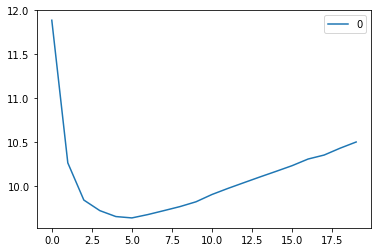

In [21]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [26]:
hp_candidates = [{"max_depth" : [1,3,5,7,9,None],"min_samples_leaf":[2,3,4,5],"max_leaf_nodes":[None,10,20]}]
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=hp_candidates, cv=5)
grid.fit(X_train1,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 3, 5, 7, 9, None],
                          'max_leaf_nodes': [None, 10, 20],
                          'min_samples_leaf': [2, 3, 4, 5]}])

In [25]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

Tuned Hyperparameters : {'max_depth': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 3}
Accuracy : 0.8236125600489421


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=hp_candidates, cv=5)

grid.fit(X_train1,y_train)

In [ ]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K,p=2,weights='distance')

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn import tree
text_representation = tree.export_text(regr)
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=['x','y','dx','dy'], filled=True)